<a href="https://colab.research.google.com/github/SergioDLezama/Retail-Analysis/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Git clone to get the data
!git clone https://github.com/SergioDLezama/Retail-Analysis

fatal: destination path 'Retail-Analysis' already exists and is not an empty directory.


In [47]:
# Importing data viz and data treatment libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

# Importing clustering algorithms
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [11]:
# Setting a style and number of Columns
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
sns.set_palette('Blues_r')

In [12]:
# Importing the data
df = pd.read_csv('/content/Retail-Analysis/retail_data.csv')

In [13]:
# Creating a copy just i case
data = df.copy()

In [14]:
# I a m not running this because it displays personal info as email
#df.head(3)

In [15]:
# Shape of the data before transforming. 302,010 Rows and 30 Columns
df.shape

(302010, 30)

In [16]:
# Description of the columns, there is some missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [17]:
# Amount of missing data per column
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [18]:
# Dropping rows with missing data
df = df.dropna()

In [19]:
# Checking if there is still missing data
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [20]:
# After dropping the missing and sensible data there is 293,911 rows and 24 columns
df.shape

(293911, 30)

In [21]:
# Dropping the columns that contain sensible data
cols_to_drop = ['Name', 'Email', 'Phone', 'Address', 'Zipcode','Time']
df = df.drop(cols_to_drop, axis=1)

In [22]:
# Quick view of the data
df.head(3)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [23]:
# Statistical description of the numerical columns on the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,293911.0,5.493726e+06,2.596086e+06,1.000007e+06,3.245886e+06,5.495879e+06,7.738197e+06,9.999995e+06
Customer_ID,293911.0,5.501340e+04,2.600944e+04,1.000000e+04,3.247000e+04,5.502700e+04,7.751400e+04,9.999900e+04
Age,293911.0,3.546577e+01,1.501775e+01,1.800000e+01,2.200000e+01,3.200000e+01,4.600000e+01,7.000000e+01
Year,293911.0,2.023165e+03,3.712938e-01,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03,2.024000e+03
Total_Purchases,293911.0,5.359864e+00,2.868440e+00,1.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
Amount,293911.0,2.551533e+02,1.413886e+02,1.000022e+01,1.328397e+02,2.554632e+02,3.776386e+02,4.999979e+02
Total_Amount,293911.0,1.367687e+03,1.128895e+03,1.000375e+01,4.388528e+02,1.041164e+03,2.028954e+03,4.999626e+03
Ratings,293911.0,3.162301e+00,1.320762e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [24]:
# There is 3 duplicated rows
df.duplicated().sum()

3

In [25]:
# Getting the indexes
dup = df.duplicated()
df[dup].index

Index([299759, 301362, 301486], dtype='int64')

In [26]:
# Dropping the duplicated
df = df.drop(df.index[dup])

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape

(293908, 24)

In [29]:
# The transaction IDs are not unique which is a problem
df['Transaction_ID'].nunique()

287005

In [30]:
# There is multiple transactions with the same ID
df['Transaction_ID'].value_counts()

Transaction_ID
6145934.0    4
9918529.0    3
6592672.0    3
1858467.0    3
2452608.0    3
            ..
4487444.0    1
6826016.0    1
2050516.0    1
6943631.0    1
9099074.0    1
Name: count, Length: 287005, dtype: int64

In [31]:
'''
Clearly there is some transaction IDs duplicated, but i do not know which one is the real
 so i will drop all the transaction IDs that appear more than 1 time
'''
df[df['Transaction_ID']==6145934]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
140676,6145934.0,76353.0,Hamilton,Ontario,Canada,26.0,Male,Medium,Regular,11/29/2023,2023.0,January,3.0,146.113218,438.339655,Electronics,Whirepool,Fridge,Good,Express,Credit Card,Delivered,3.0,French door refrigerator
194626,6145934.0,23433.0,Bochum,Berlin,Germany,22.0,Female,Low,Regular,3/24/2023,2023.0,March,1.0,180.739974,180.739974,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Credit Card,Delivered,1.0,Pillowcase set
300648,6145934.0,76353.0,Hamilton,Ontario,Canada,56.0,Male,Medium,Premium,11/29/2023,2023.0,November,3.0,146.113218,438.339655,Clothing,Zara,Dress,Good,Express,Cash,Pending,4.0,Casual dress
301371,6145934.0,23433.0,Bochum,Berlin,Germany,22.0,Female,Low,Regular,3/24/2023,2023.0,March,1.0,180.739974,180.739974,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Cash,Delivered,1.0,Throw pillow


In [32]:
# Dropping duplicated IDs
duplicate_transaction_ids = df['Transaction_ID'].value_counts()[lambda x: x > 1].index
duplicate_indexes = df[df['Transaction_ID'].isin(duplicate_transaction_ids)].index
df = df.drop(duplicate_indexes)

In [33]:
# All the transaction IDs are unique
df['Transaction_ID'].value_counts()

Transaction_ID
2174773.0    1
2416371.0    1
5736738.0    1
5060644.0    1
2195548.0    1
            ..
3897203.0    1
2970871.0    1
3374752.0    1
9948479.0    1
9099074.0    1
Name: count, Length: 280216, dtype: int64

In [34]:
# Resetting the Index
df = df.reset_index(drop=True)

In [35]:
# We are left with 280,216 rows and 24 columns
df.shape

(280216, 24)

In [36]:
# Getting the Categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Month', 'Product_Category', 'Product_Brand', 'Product_Type',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'products'],
      dtype='object')

In [37]:
# Simple for cycle to see the values inside the categorical columns
for col in cat_cols:
  print('*'*25)
  print(df[col].value_counts(normalize=True))

*************************
City
Chicago          0.072326
Portsmouth       0.067277
San Francisco    0.040915
Frankfurt        0.033910
Boston           0.031483
                   ...   
Kansas City      0.002848
Denver           0.002830
Arlington        0.002784
San Diego        0.002769
Philadelphia     0.002766
Name: proportion, Length: 130, dtype: float64
*************************
State
England            0.209135
Berlin             0.174505
New South Wales    0.149874
Ontario            0.149577
Connecticut        0.072419
Maine              0.040993
Georgia            0.031815
Kansas             0.018457
New Mexico         0.017337
New York           0.003315
Maryland           0.003265
Pennsylvania       0.003173
California         0.003158
Texas              0.003151
Ohio               0.003133
Illinois           0.003119
Nevada             0.003115
South Carolina     0.003112
Hawaii             0.003101
Mississippi        0.003101
Minnesota          0.003094
Michigan         

In [38]:
# I am going to replace Mitsubishi AC and BluesStar AC to just AC
df.Product_Type.value_counts()

Product_Type
Water                                 22749
Smartphone                            17048
Non-Fiction                           16816
Fiction                               16732
Juice                                 11359
Television                            11350
T-shirt                               11307
Decorations                           11292
Shoes                                 11223
Tablet                                11184
Soft Drink                            11164
Furniture                             11161
Fridge                                 7024
Mitsubishi 1.5 Ton 3 Star Split AC     6334
Thriller                               5818
Kitchen                                5773
Children's                             5703
Shirt                                  5700
Coffee                                 5691
Jeans                                  5675
Dress                                  5667
Chocolate                              5654
Shorts             

In [39]:
# Replacing
df['Product_Type'] = df['Product_Type'].replace({'Mitsubishi 1.5 Ton 3 Star Split AC':'AC','BlueStar AC':'AC'})

In [40]:
df.head(1)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab


I plan to do some clustering on the data. K-Means, on the transaction data

In [43]:
# After cleaning the data there is 280,216 rows and 24 columns
df.shape

(280216, 24)

In [44]:
# Setting a new DataFrame with the columns that are useful for the clustering
cols_to_keep = ['Country','Age','Gender','Income','Customer_Segment','Total_Purchases','Total_Amount','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','Ratings']
df_cluster = df[cols_to_keep].copy()
df_cluster.head()

,Country,Age,Gender,Income,Customer_Segment,Total_Purchases,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings
0,UK,19.0,Female,Low,Premium,2.0,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0
1,Australia,48.0,Male,Low,Regular,3.0,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0
2,Canada,56.0,Male,High,Premium,7.0,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0
3,UK,22.0,Male,Low,Premium,2.0,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0
4,Australia,58.0,Female,Medium,Premium,4.0,1185.167224,Electronics,Apple,Tablet,Good,Express,PayPal,Pending,4.0


In [46]:
# 280216 rows and 15 columns
df_cluster.shape

(280216, 15)

In [49]:
# Setting the names of the columns for the regularization
categorical_columns = [
    'Country', 'Gender', 'Customer_Segment', 'Product_Category',
    'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
    'Payment_Method', 'Order_Status', 'Income'
]
numerical_columns = ['Age', 'Total_Purchases', 'Total_Amount', 'Ratings']

In [50]:
# Procesing data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Transform the data
df_prepared = preprocessor.fit_transform(df_cluster)

# Convert to DataFrame
df_prepared_copy = pd.DataFrame(df_prepared.toarray(), columns=preprocessor.get_feature_names_out())
df_prepared = pd.DataFrame(df_prepared.toarray())


In [52]:
# Quick view of the data
df_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
0,-1.093368,-1.172641,-0.497705,0.632576,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.840276,-0.824058,-0.270318,-0.883174,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.373695,0.570278,0.972724,0.632576,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.893336,-1.172641,-0.992075,-1.641050,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.507050,-0.475474,-0.162495,0.632576,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [54]:
# Now we have 87 columns
df_prepared.shape

(280216, 87)

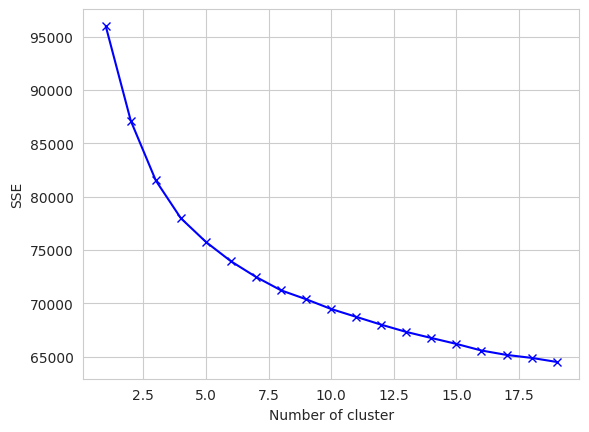

In [55]:
# Sample the data so the process is faster
df_sample = df_prepared.sample(n=8000, random_state=7)

# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_sample)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

I am using the elbow method but there is no clear pattern so i will use  a different method

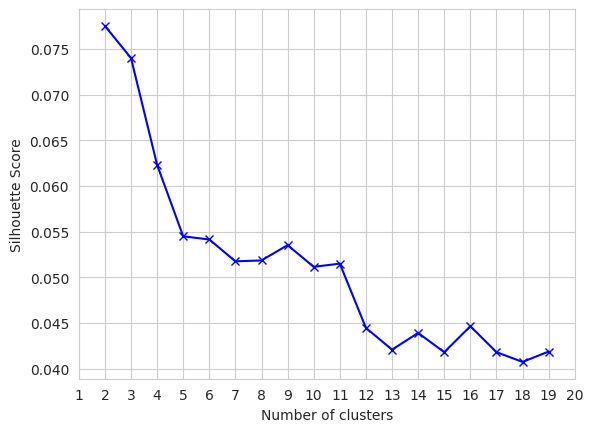

In [56]:
# Sample the data
df_sample = df_prepared.sample(n=8000, random_state=7)

# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 20):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=1, batch_size=1000).fit(df_sample)

    labels = minibatch_kmeans.predict(df_sample)

    sc[k] = silhouette_score(df_sample, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xticks(range(1, 21))

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

plt.show()

I will try first with 8 Clusters so it is easier to analyze.

In [57]:
# Setting a new Dataframe that is going to have the K-Labels
df_k = df.copy(deep=True)

In [58]:
# Running the KMeans
kmeans = KMeans(n_clusters = 8, random_state = 7)

kmeans.fit(df_prepared)

# Adding predicted labels to the original data and the scaled data
df_prepared_copy['KMeans_Labels'] = kmeans.predict(df_prepared)

df_k['KMeans_Labels'] = kmeans.predict(df_prepared)

In [59]:
# Adding 1 to the labels so it goes from 0 - 7 to 1 - 8
df_k['KMeans_Labels'] = df_k['KMeans_Labels'].apply(lambda x: x + 1)

In [61]:
# Biggest Cluster is #3 with 15% of the data
df_k['KMeans_Labels'].value_counts(normalize=True)

KMeans_Labels
3    0.158546
7    0.152043
5    0.134353
1    0.120814
6    0.118423
4    0.112035
2    0.108313
8    0.095473
Name: proportion, dtype: float64

In [63]:
cluster_kmeans = df_prepared_copy.groupby('KMeans_Labels')

In [62]:
# Function to plot Product Brand and Type by Cluster
def brand_type_by_k(k):
  filtered_df = df_k[df_k['KMeans_Labels'].isin([k])]

  cat_cols2 = ['Product_Type']

  for col in cat_cols2:
      # Get the top 10 most frequent values from the filtered DataFrame
      top_10_values = filtered_df[col].value_counts().nlargest(10).index
      top_10_df = filtered_df[filtered_df[col].isin(top_10_values)]

      plt.figure(figsize=(12,6))
      ax = sns.countplot(data=top_10_df, x=col, width=0.6, order=top_10_df[col].value_counts().index)
      plt.xticks(rotation=45)

      # Calculate percentages
      total = len(top_10_df[col])
      max_height = max([p.get_height() for p in ax.patches])
      ax.set_ylim(0, max_height * 1.1)  # Increase y-axis limit by 10%

      for p in ax.patches:
          percentage = f'{100 * p.get_height() / total:.1f}%'
          x = p.get_x() + p.get_width() / 2
          y = p.get_height()
          ax.annotate(percentage, (x, y), ha='center', va='bottom')
      plt.title(f'{col.replace("_", " ")} Distribution By {k}')
      plt.xlabel('')
      plt.tight_layout()
      plt.show()

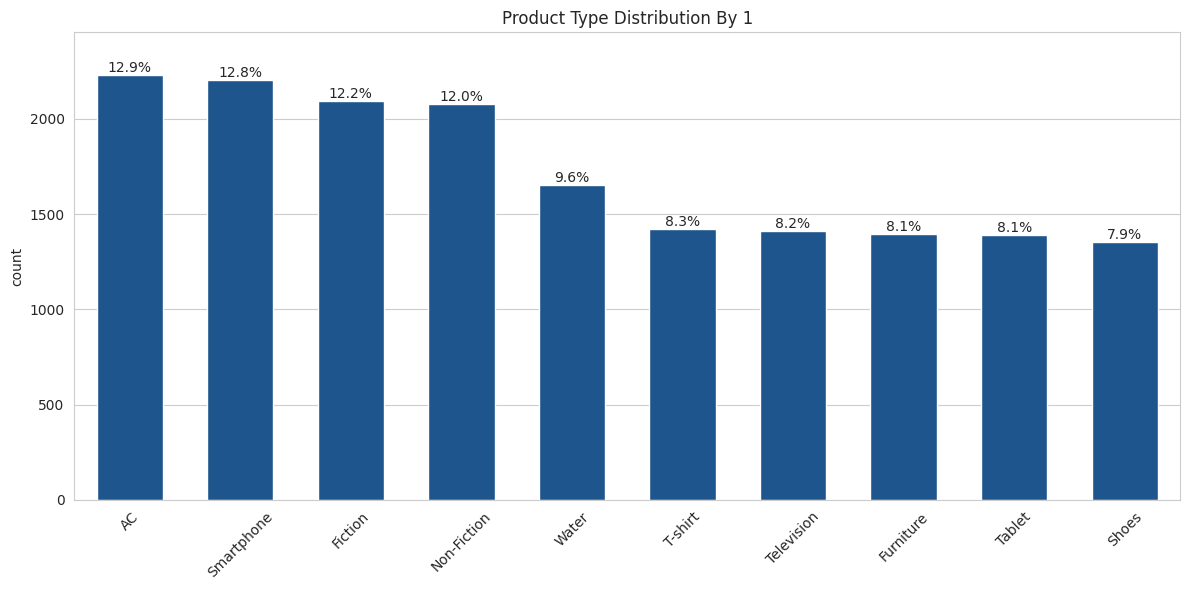

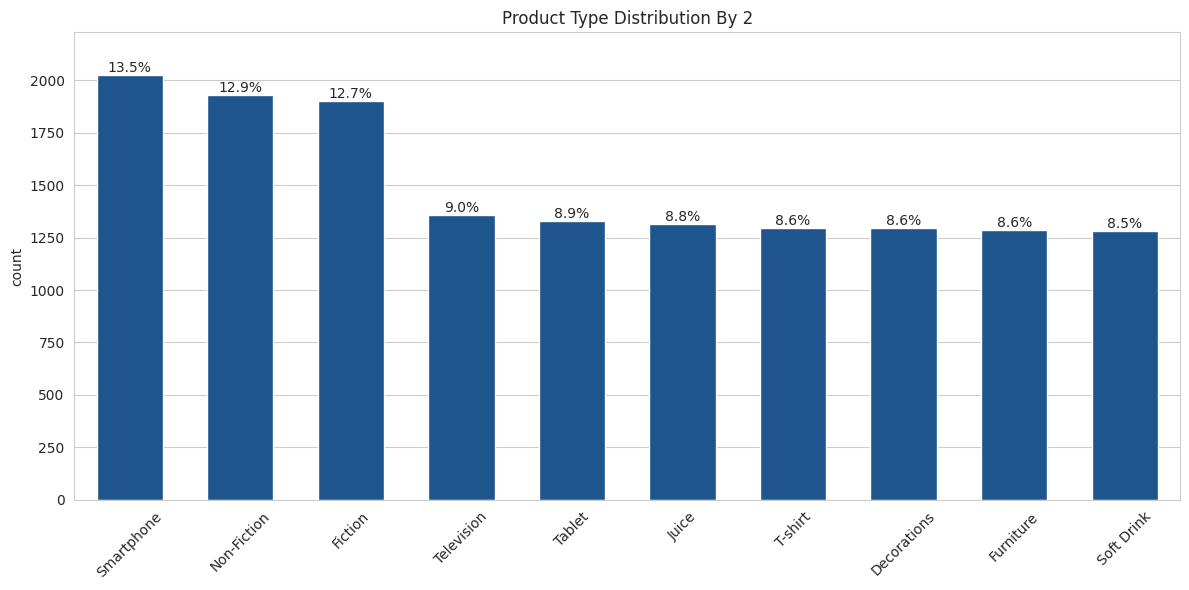

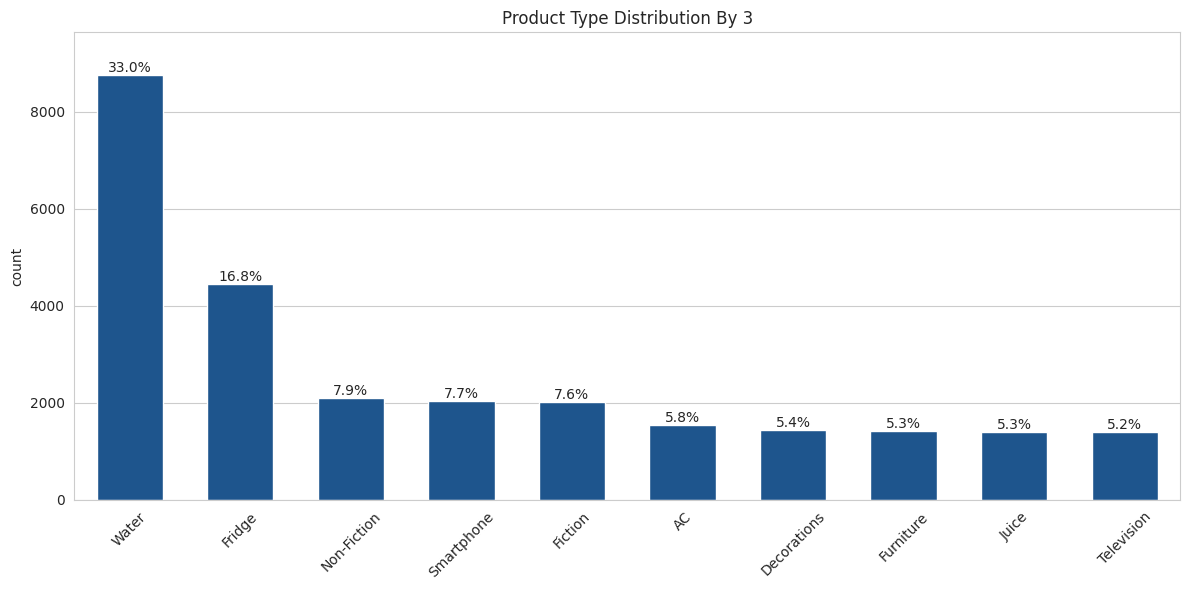

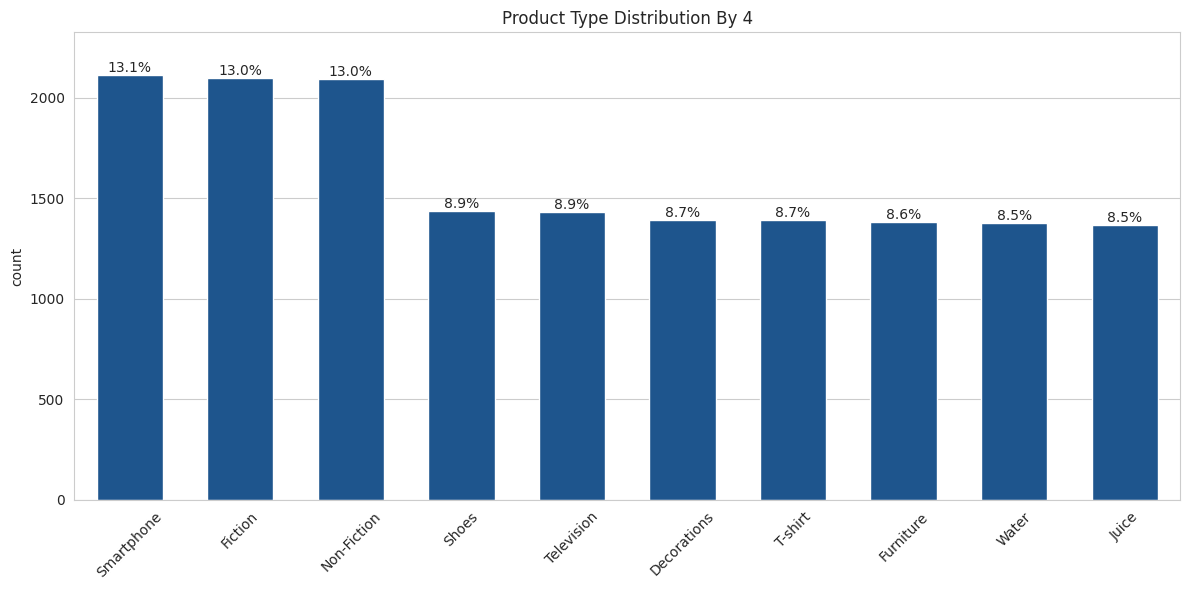

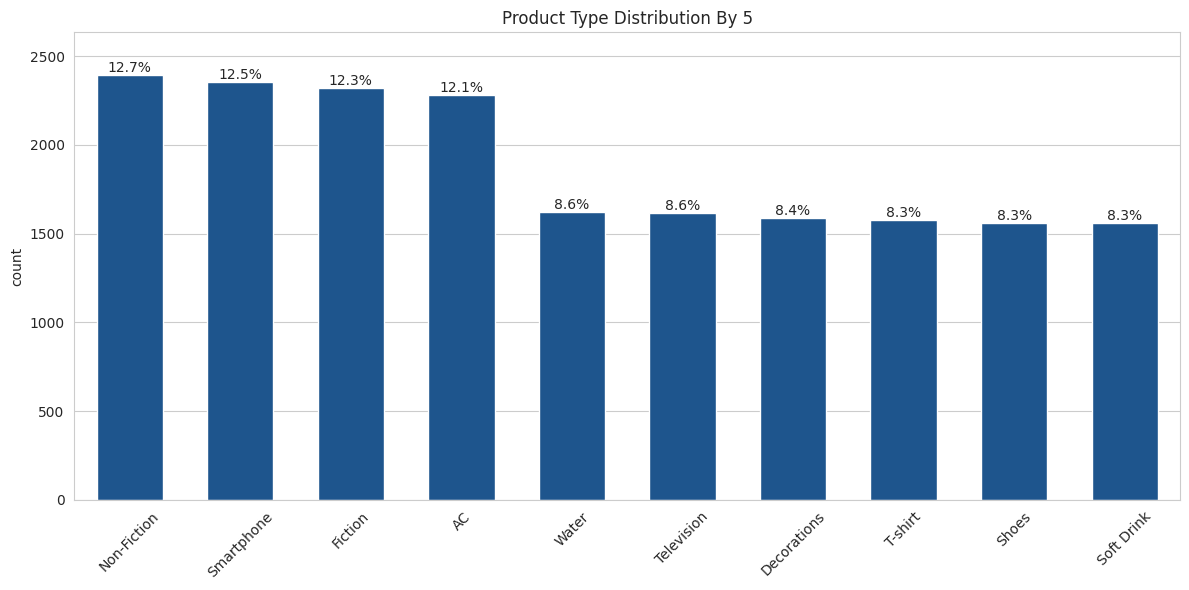

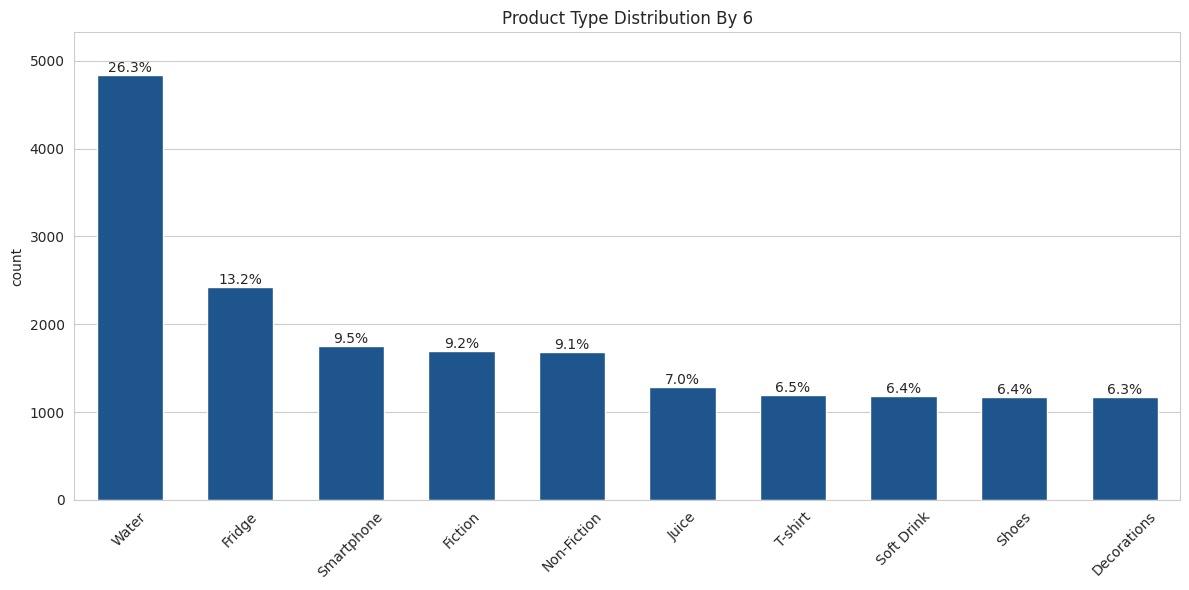

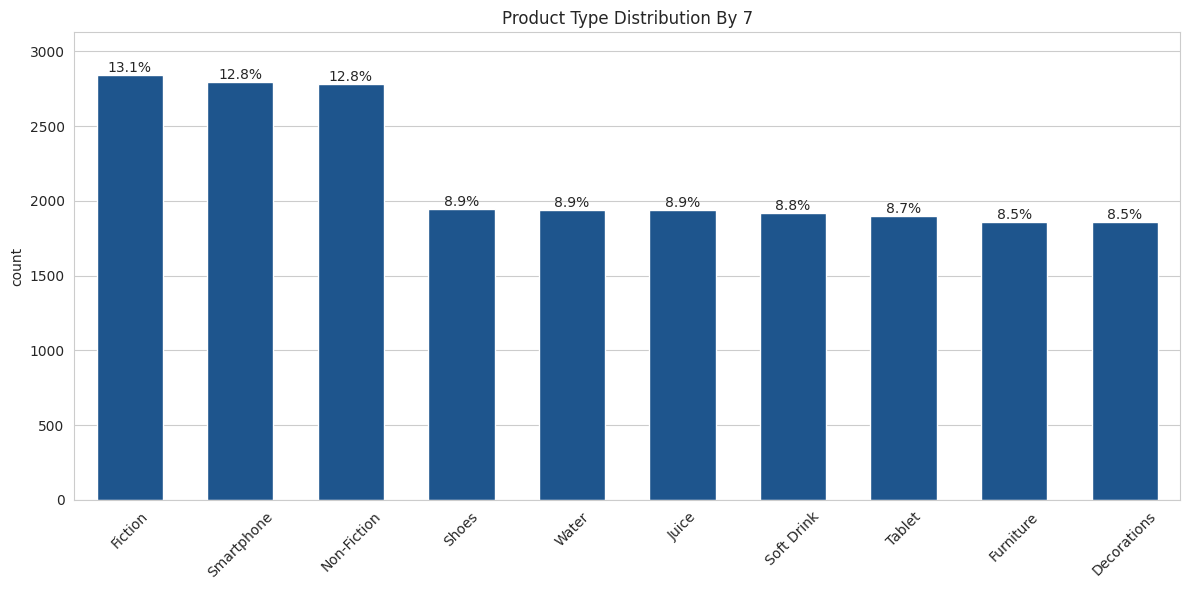

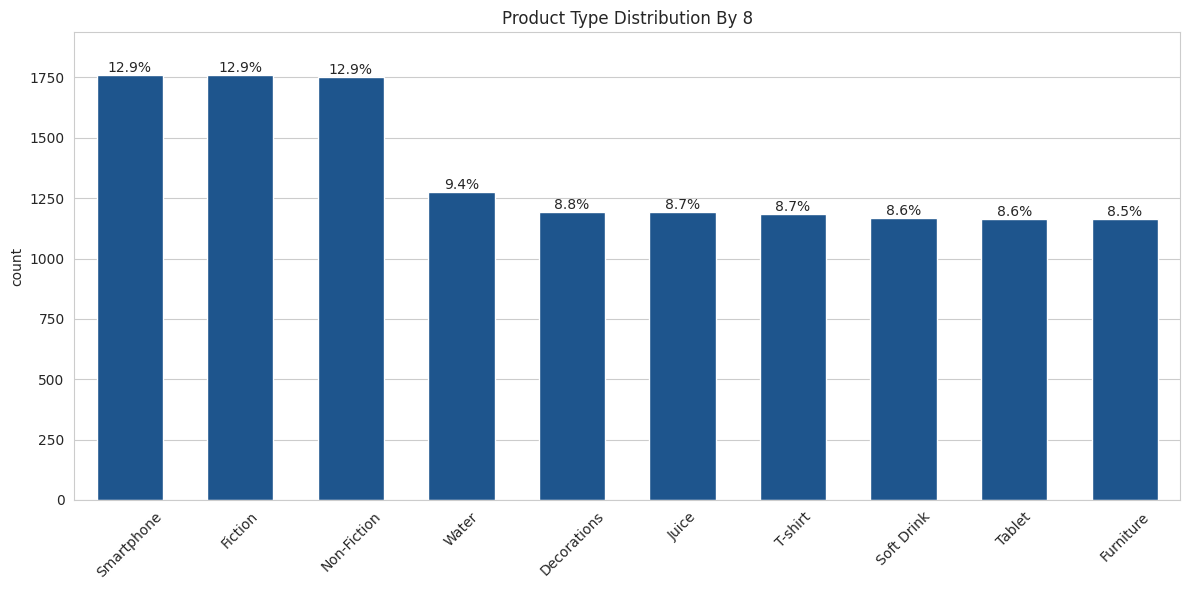

In [64]:
for i in range(1,9):
  brand_type_by_k(i)
  plt.show()

In [73]:
# Simple function, plots a KDE distribution by cluster
def kde_by_k(k,col):
  filtered_df = df_k[df_k['KMeans_Labels'].isin([k])]
  sns.kdeplot(data=filtered_df, x=col, fill=True)
  plt.xticks(np.arange(1,11))

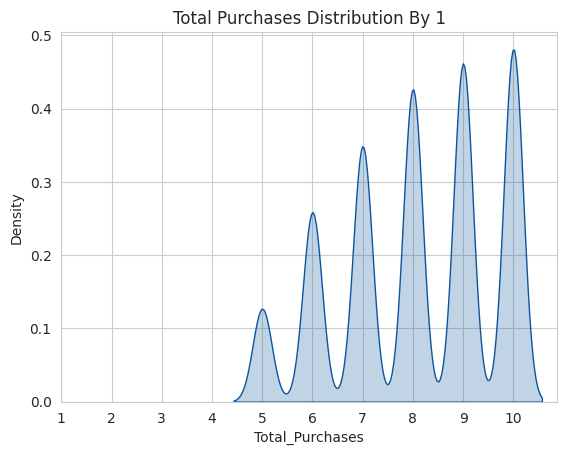

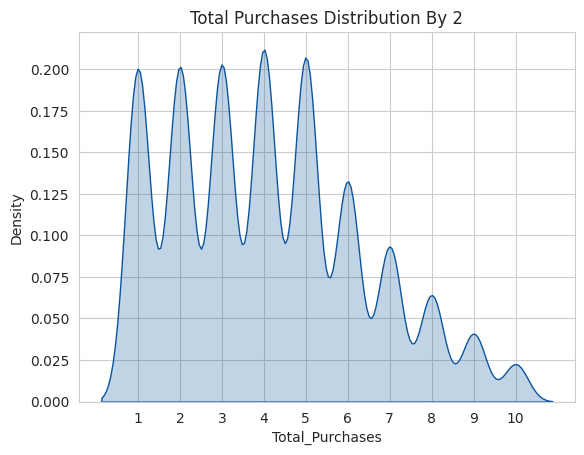

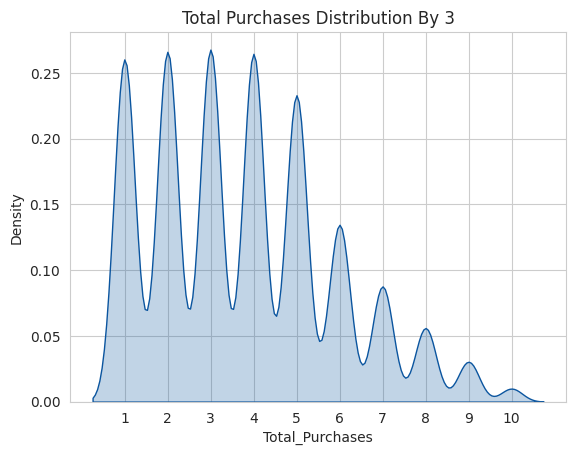

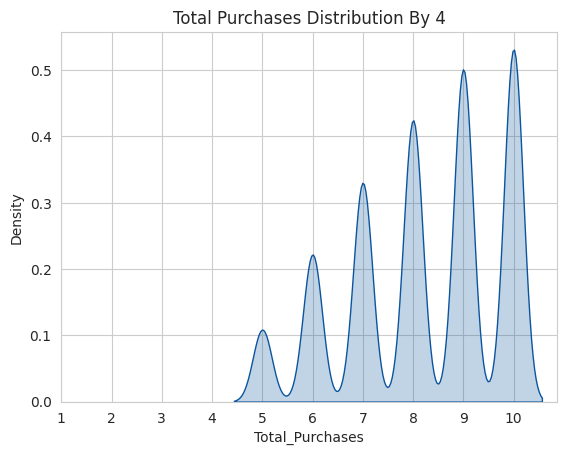

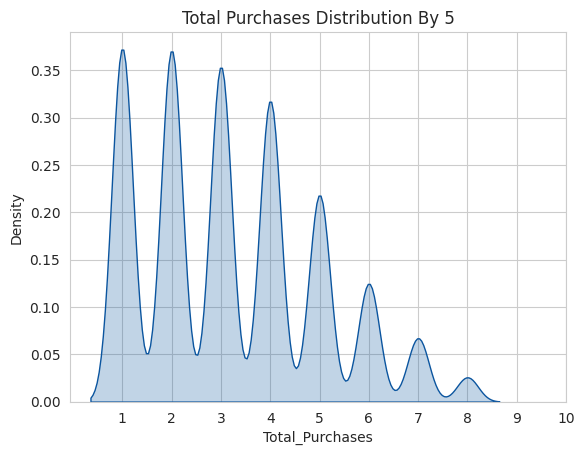

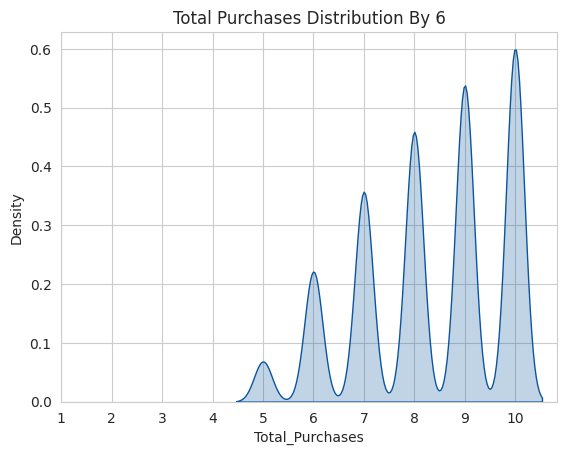

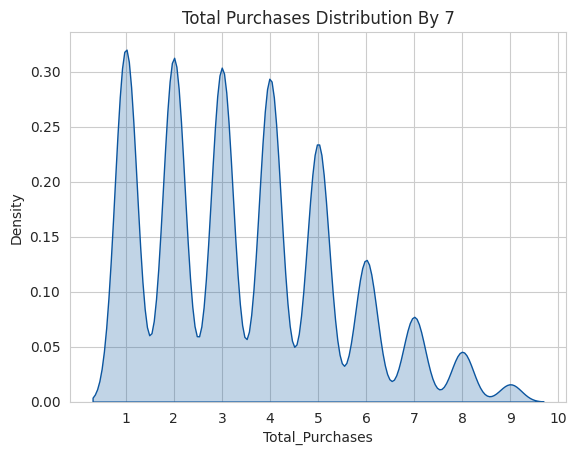

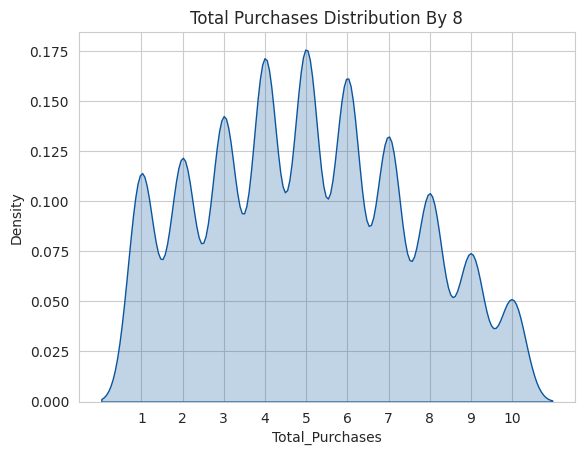

In [74]:
# Plotting all the clusters
for i in range(1,9):
  kde_by_k(i,'Total_Purchases')
  plt.title(f'Total Purchases Distribution By {i}')
  plt.show()

In [78]:
df.head()

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
1,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
2,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,05-08-23,2023.0,May,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
3,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,01-10-24,2024.0,January,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
4,6095326.0,41289.0,Brisbane,New South Wales,Australia,58.0,Female,Medium,Premium,9/21/2023,2023.0,September,4.0,296.291806,1185.167224,Electronics,Apple,Tablet,Good,Express,PayPal,Pending,4.0,Lenovo Tab


In [136]:
'''
This Function makes 6 plots. to see the distributions between clusters
I want to remark that the xticks and yticks are standarized
'''
def analysis_by_k(k):
    # Filter the dataframe for the selected cluster
    filtered_df = df_k[df_k['KMeans_Labels'] == k]
    cluster_per = int(filtered_df.shape[0] / df_k.shape[0] * 100)

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle(f'Analysis of Cluster {k} Represents {cluster_per}%',fontsize = 20)

    # Countplot for Ratings
    ratings_counts = filtered_df['Ratings'].value_counts().sort_index()
    axes[0, 0].bar(ratings_counts.index, ratings_counts.values)
    axes[0, 0].set_title(f'Cluster {k}: Ratings Countplot')
    axes[0, 0].set_xlim(0.5, 5.5)
    axes[0, 0].set_xticks(range(1, 6))
    axes[0, 0].set_xlabel('Ratings')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_ylim(10, 30000)

    # Countplot for top 10 Product_Type
    top_product_types = filtered_df['Product_Type'].value_counts().head(10).index
    sns.countplot(data=filtered_df[filtered_df['Product_Type'].isin(top_product_types)],
                  x='Product_Type', ax=axes[0, 1], order=top_product_types)
    axes[0, 1].set_title(f'Cluster {k}: Top 10 Product Types', fontsize=14)
    axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)
    axes[0, 1].tick_params(axis='y', labelsize=10)
    axes[0, 1].set_ylim(0, 9500)

    # Adding percentages on top of bars
    product_counts = filtered_df['Product_Type'].value_counts().head(10)
    total_counts = product_counts.sum()
    for i, count in enumerate(product_counts):
        percentage = f'{(count / total_counts) * 100:.1f}%'
        axes[0, 1].text(i, count, percentage, ha='center', va='bottom', fontsize=10)

    # KDE plot for Age
    sns.kdeplot(data=filtered_df, x='Age', ax=axes[1, 0], fill=True)
    axes[1, 0].set_title(f'Cluster {k}: Age Distribution')
    axes[1, 0].set_xlim(15, 70)
    axes[1, 0].set_ylim(0, 0.18)

    # Histplot for Total_Amount
    sns.histplot(data=filtered_df, x='Total_Amount', ax=axes[1, 1], bins=20)
    axes[1, 1].set_title(f'Cluster {k}: Total Amount Distribution')
    axes[1, 1].set_xlim(10, 5000)
    axes[1, 1].set_ylim(0, 5000)

    # Countplot for top 10 Products
    top_products = filtered_df['products'].value_counts().head(10).index
    sns.countplot(data=filtered_df[filtered_df['products'].isin(top_products)],
                  x='products', ax=axes[0, 2], order=top_products)
    axes[0, 2].set_title(f'Cluster {k}: Top 10 Products', fontsize=14)
    axes[0, 2].tick_params(axis='x', rotation=45, labelsize=10)
    axes[0, 2].tick_params(axis='y', labelsize=10)
    axes[0, 2].set_ylim(0, 900)

    # KDE plot for Total Purchases
    sns.kdeplot(data=filtered_df, x='Total_Purchases', ax=axes[1, 2], fill=True)
    axes[1, 2].set_title(f'Cluster {k}: Total Purchases')
    axes[1, 2].set_xlim(0, 11)
    axes[1, 2].set_ylim(0, 0.75)
    axes[1, 2].set_xticks(np.arange(0, 11))

    # Adjust layout
    plt.tight_layout()


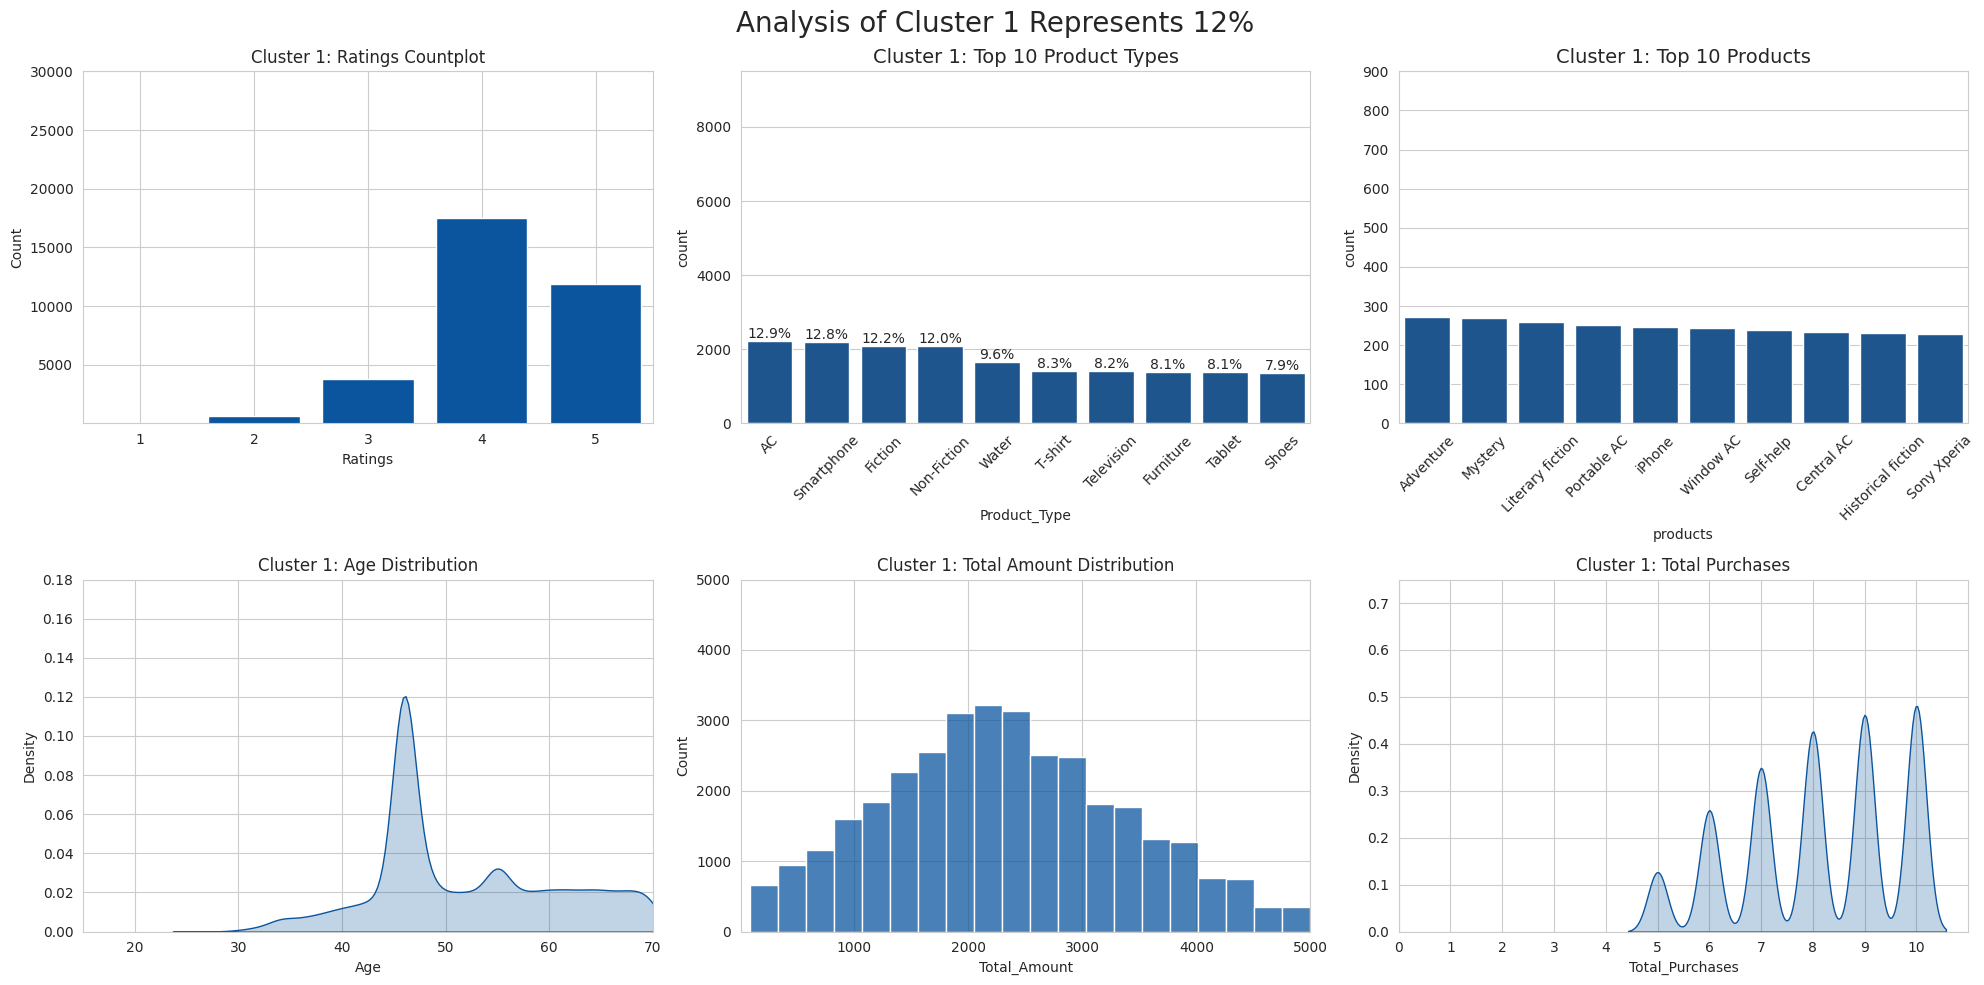

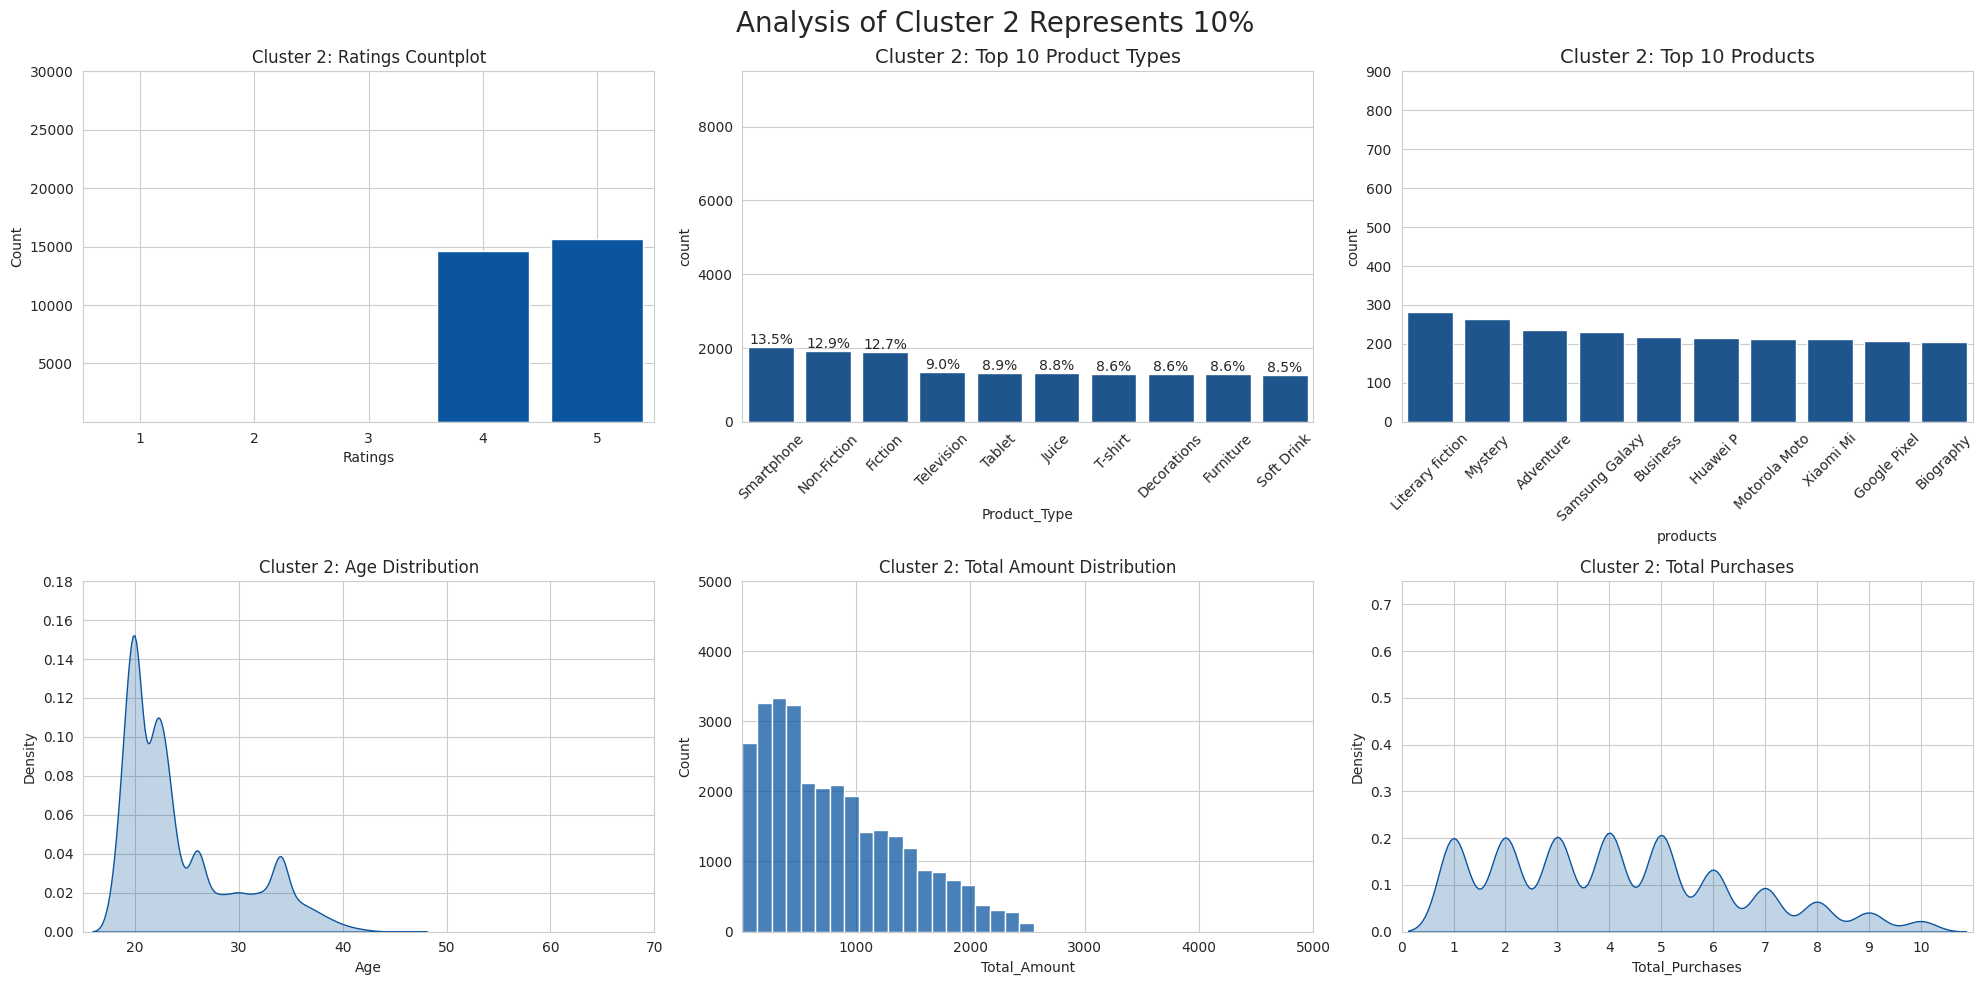

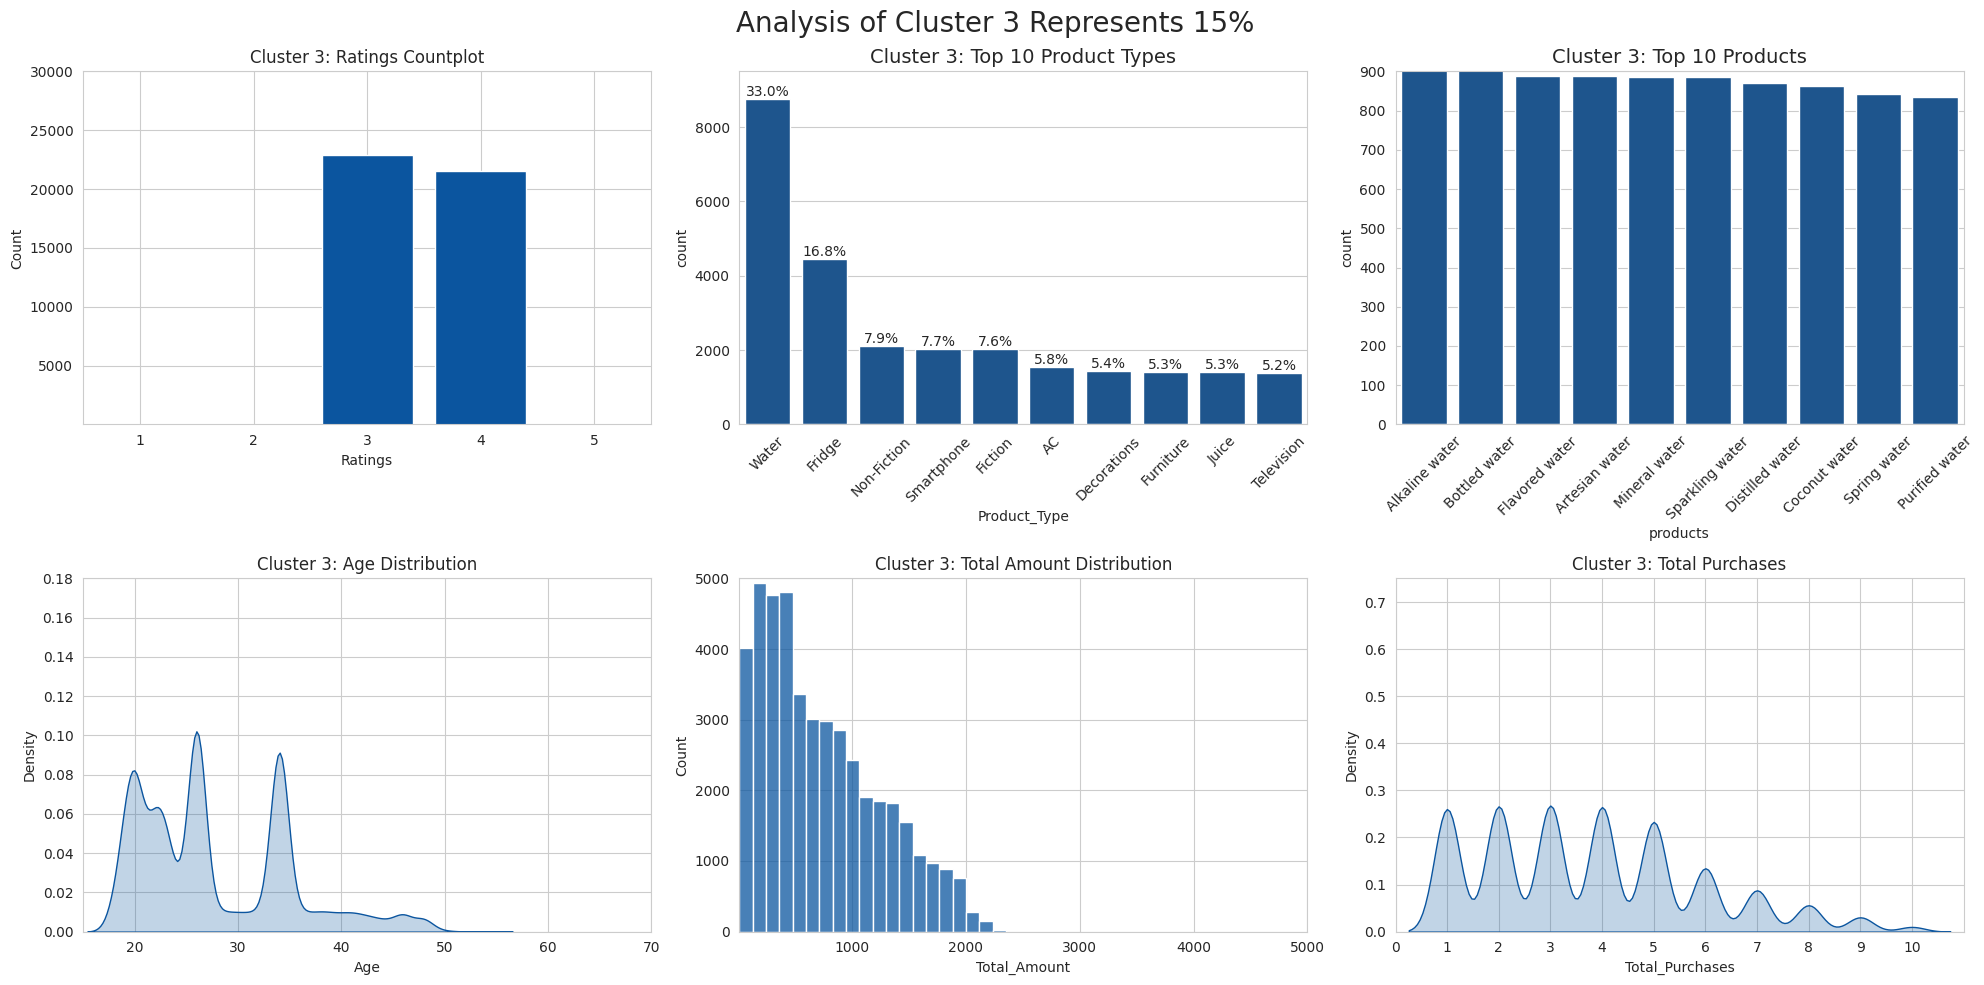

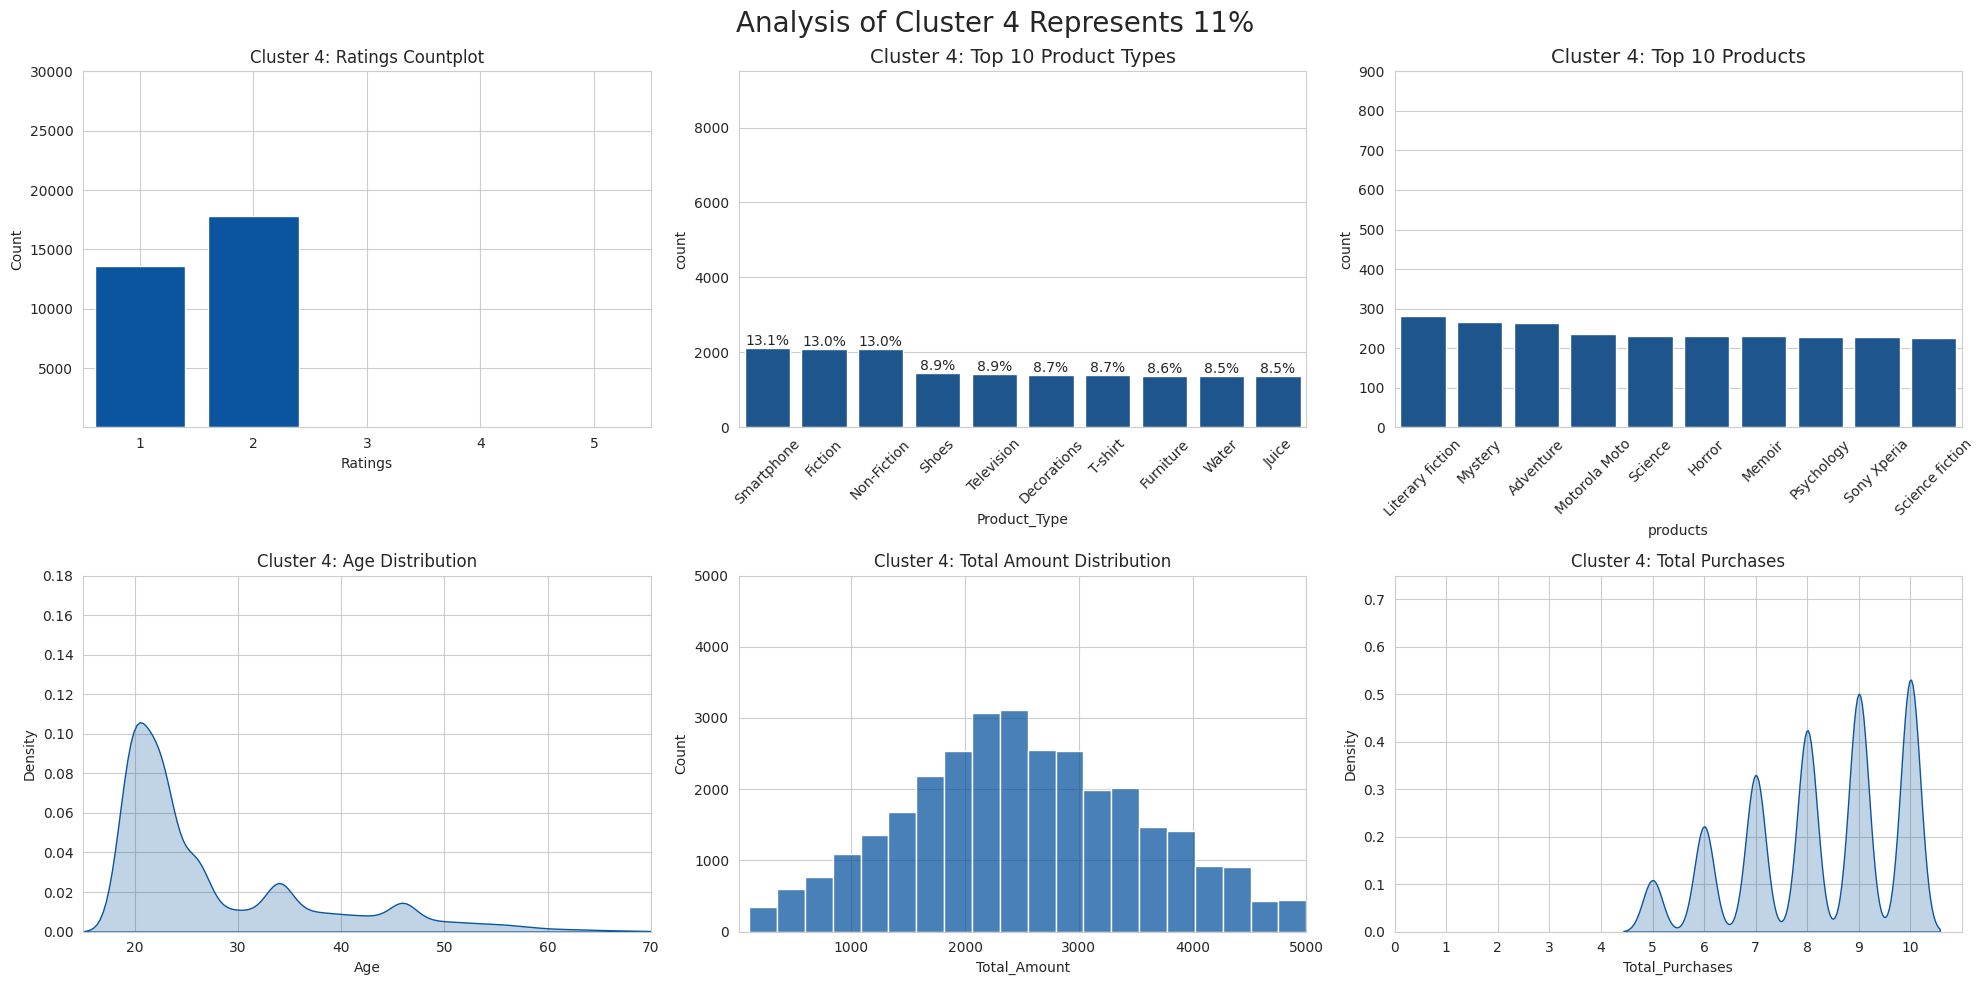

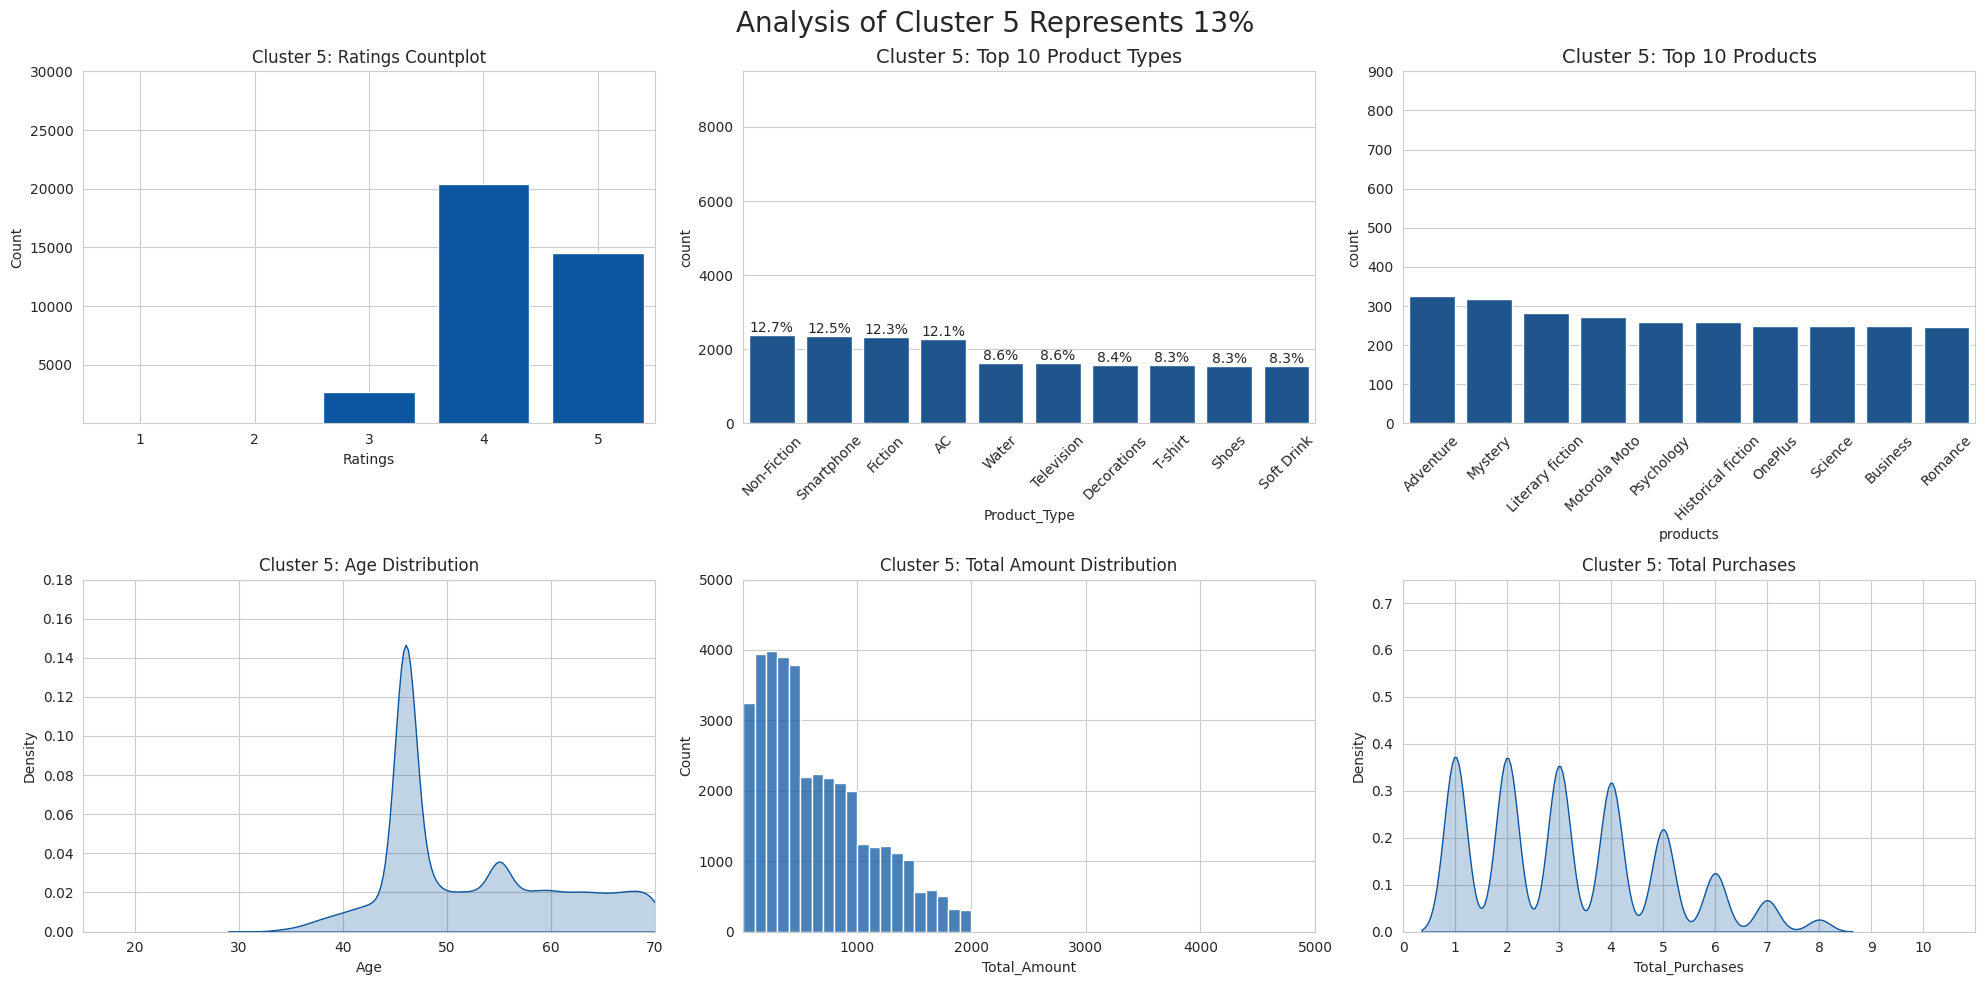

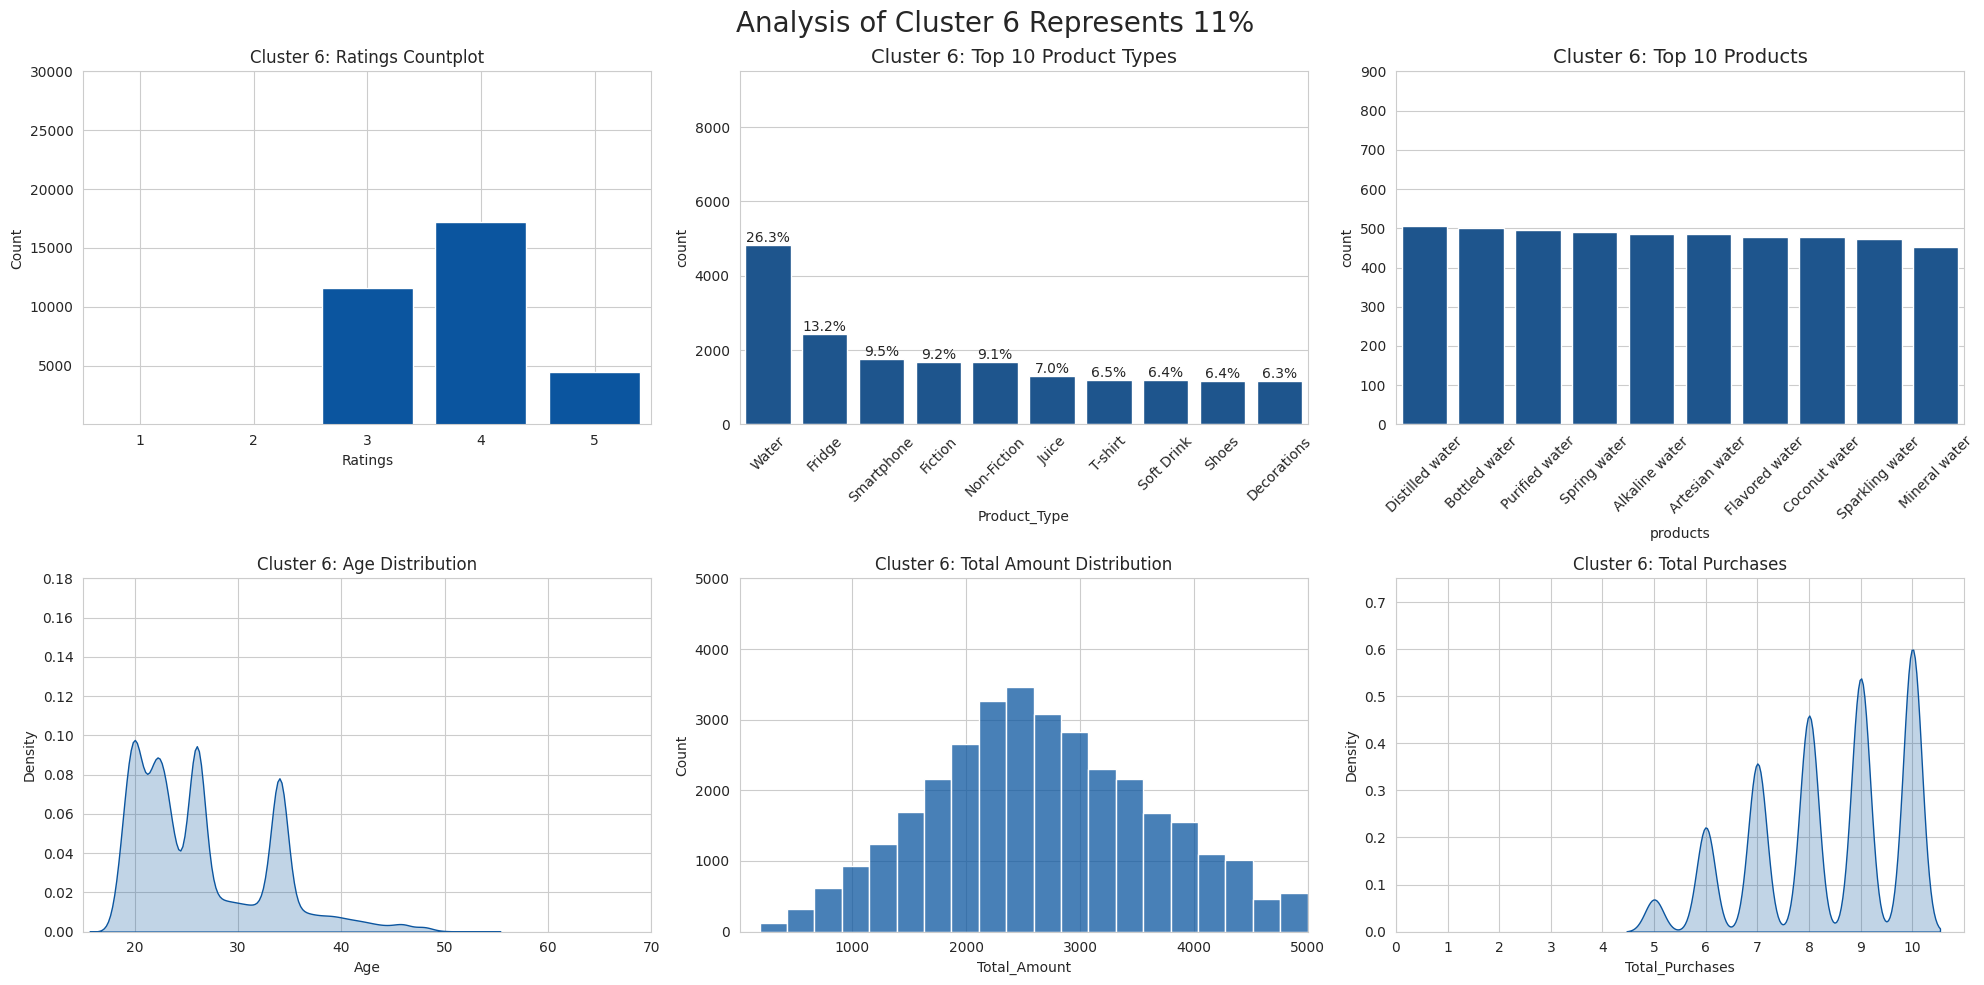

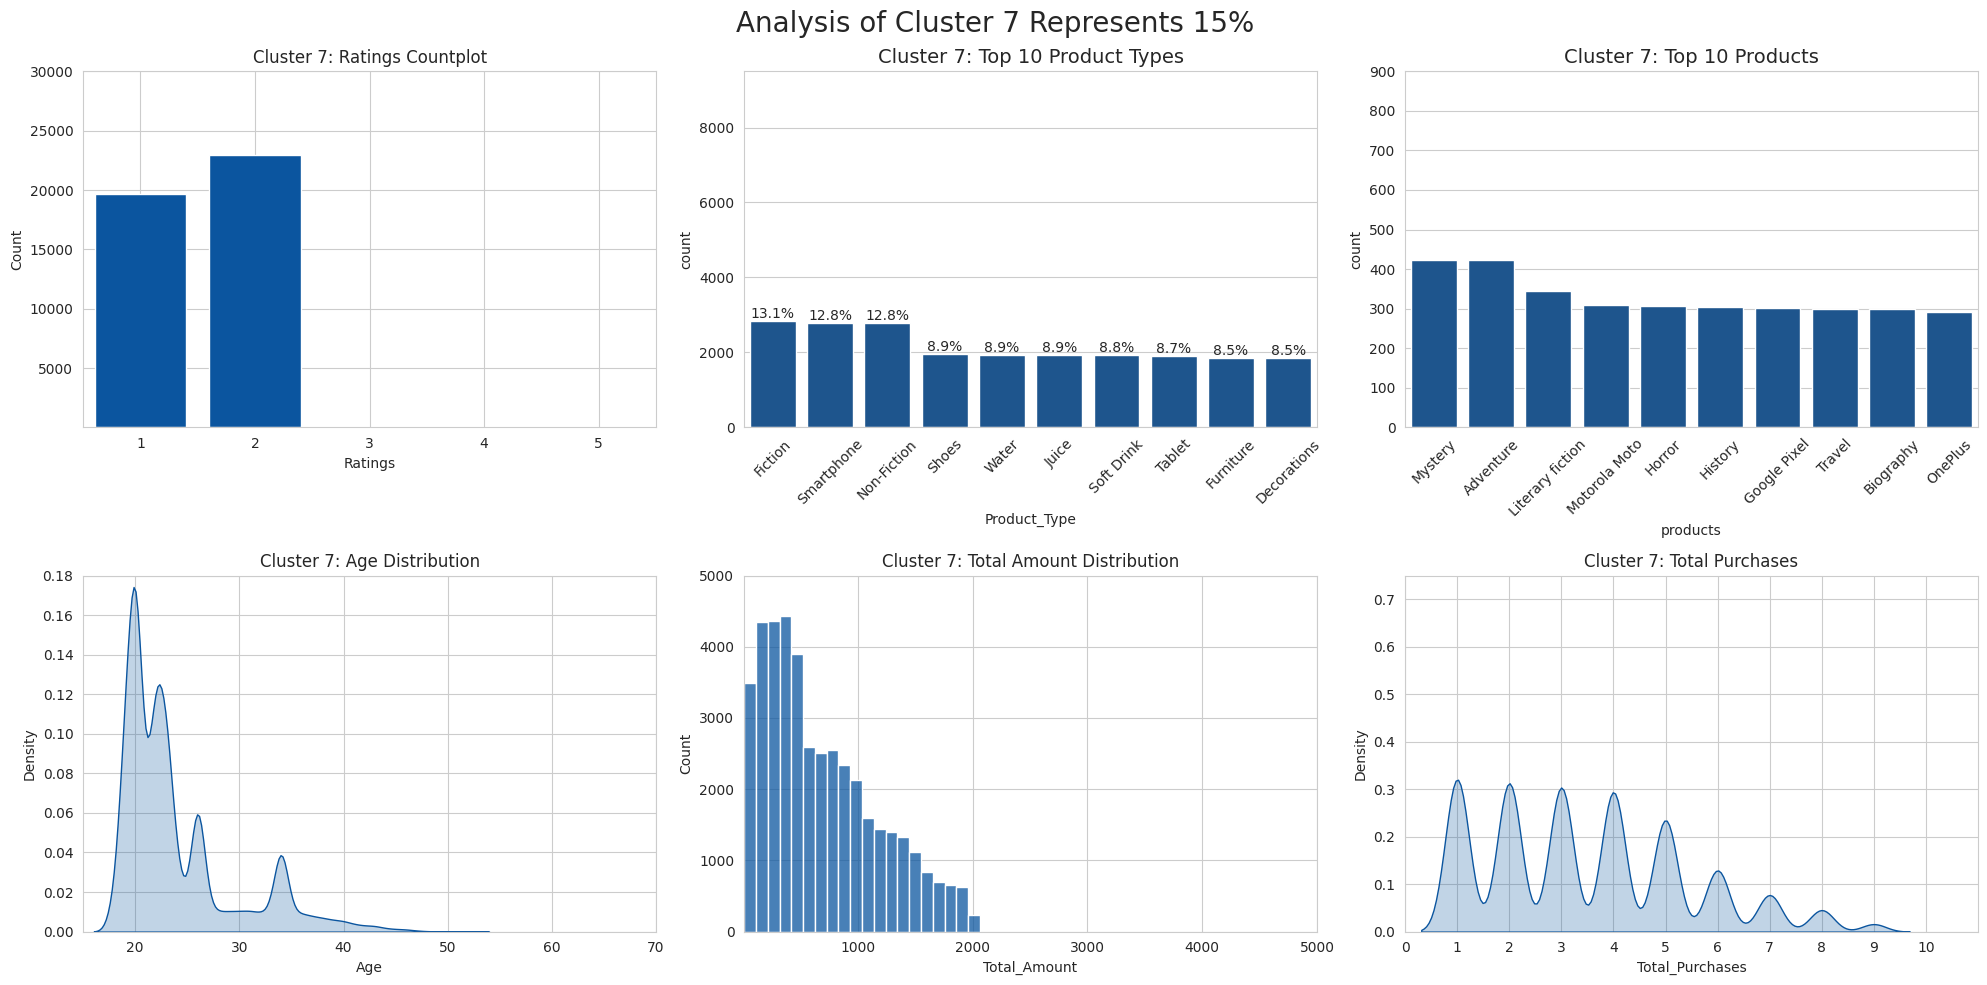

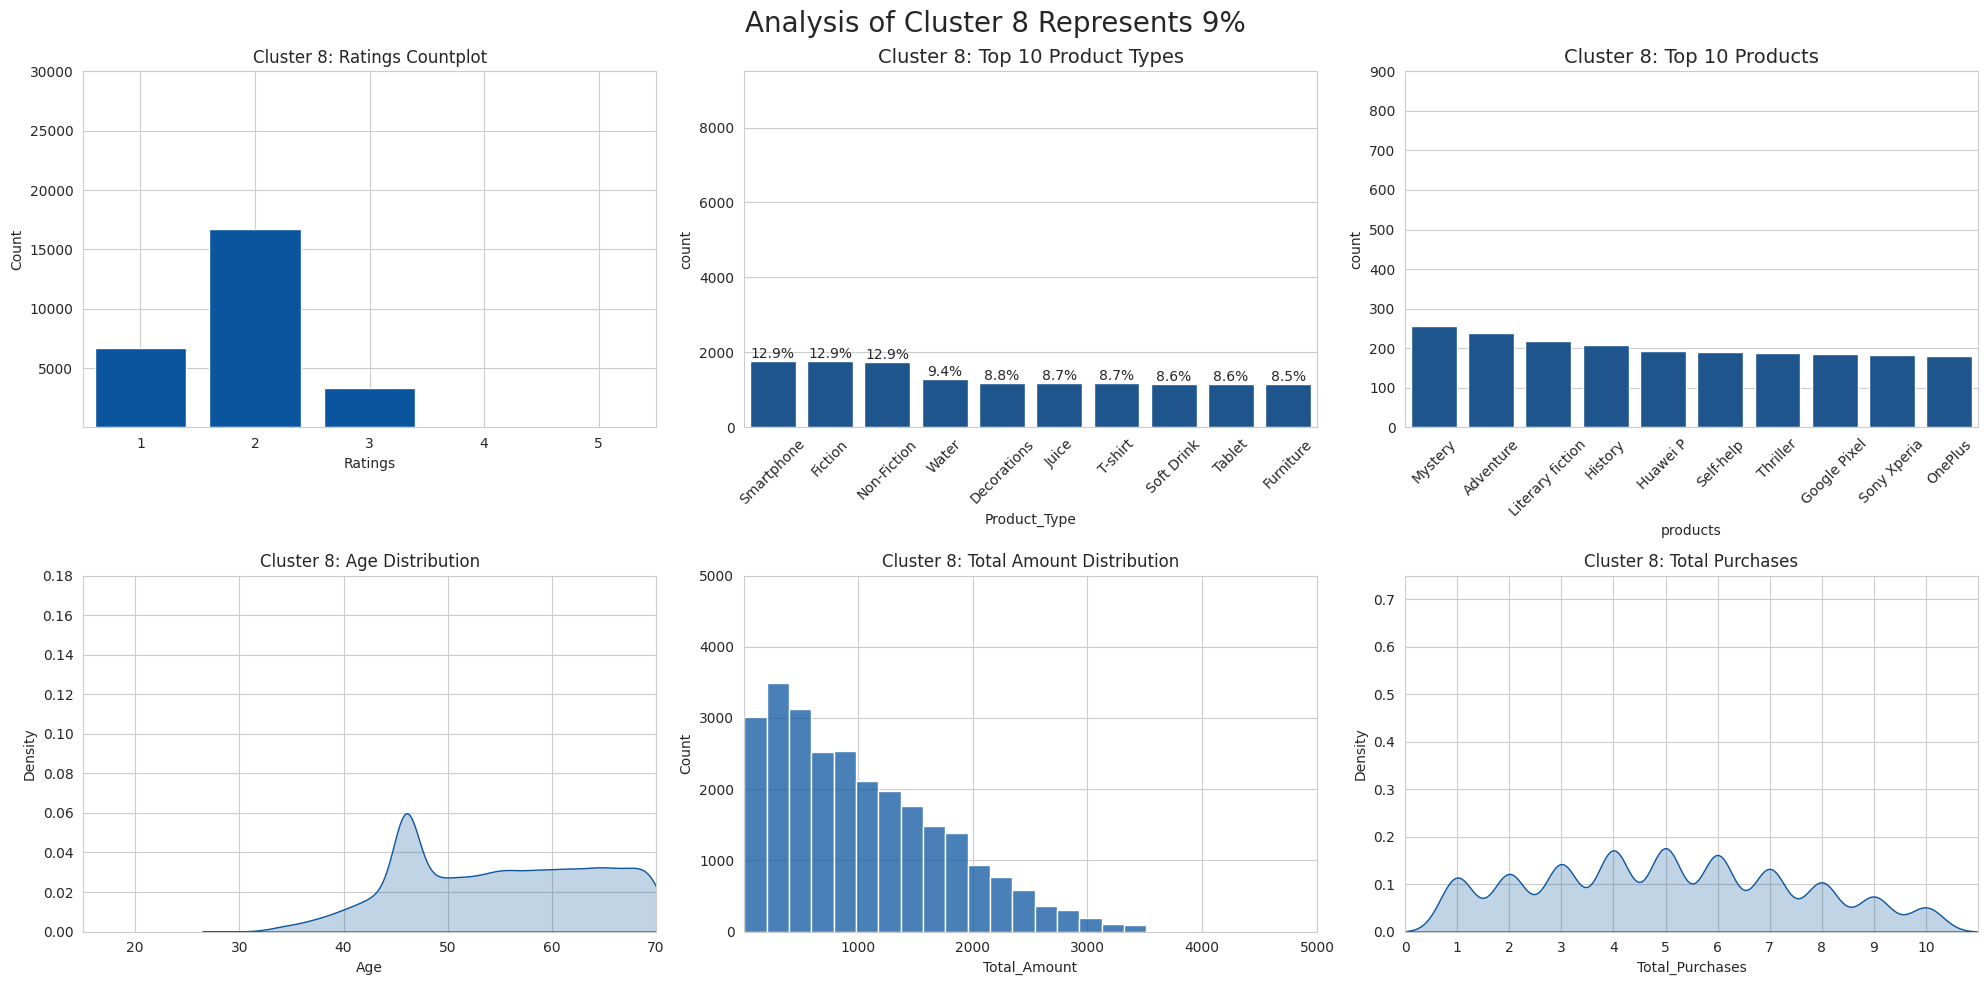

In [137]:
# Plot the 8 clusters
for i in range(1,9):
  analysis_by_k(i)
  plt.show()

In [152]:
# Creating a new DF that only contains ratings from 1 to 2
low_rating = df_k[df_k['Ratings']<3]

In [153]:
# Percentage of low ratings by Clusters
low_rating['KMeans_Labels'].value_counts(normalize=True)

KMeans_Labels
7    0.434630
4    0.320262
8    0.238733
1    0.006376
Name: proportion, dtype: float64

In [157]:
# Percentage of product types that have a low rating
low_rating['Product_Type'].value_counts(normalize=True)

Product_Type
Smartphone     0.066533
Fiction        0.066350
Non-Fiction    0.065901
Water          0.045366
Shoes          0.045039
Juice          0.044651
Decorations    0.044356
Television     0.044080
Tablet         0.044060
Soft Drink     0.043856
T-shirt        0.043754
Furniture      0.043672
Thriller       0.023249
Jeans          0.023178
Dress          0.022871
Kitchen        0.022586
Coffee         0.022576
Children's     0.022565
Shorts         0.022555
Chocolate      0.022535
Laptop         0.022229
Lighting       0.022168
Bedding        0.022127
Shirt          0.022086
Tools          0.022035
Literature     0.022004
Headphones     0.021780
Jacket         0.021637
Bathroom       0.021576
Snacks         0.021188
Fridge         0.001438
Name: proportion, dtype: float64

In [158]:
# There is 98,026 bad ratings
low_rating.shape

(98026, 25)

In [155]:
# Creating a new DF that only contains ratings from 3 to 5
high_rating = df_k[df_k['Ratings']>=3]

In [160]:
# Percentage of product types that have a high rating
high_rating['Product_Type'].value_counts(normalize=True)

Product_Type
Water          0.100456
Smartphone     0.057775
Non-Fiction    0.056842
Fiction        0.056139
AC             0.046347
Television     0.038581
T-shirt        0.038520
Juice          0.038323
Decorations    0.038114
Fridge         0.037779
Furniture      0.037763
Soft Drink     0.037680
Tablet         0.037680
Shoes          0.037368
Kitchen        0.019535
Thriller       0.019425
Shirt          0.019403
Headphones     0.019183
Children's     0.019161
Coffee         0.019090
Literature     0.019084
Jacket         0.018942
Chocolate      0.018909
Lighting       0.018903
Shorts         0.018810
Dress          0.018799
Bathroom       0.018706
Jeans          0.018678
Bedding        0.018651
Snacks         0.018547
Laptop         0.018519
Tools          0.018289
Name: proportion, dtype: float64

In [161]:
# Percentage of high ratings by Clusters
high_rating['KMeans_Labels'].value_counts(normalize=True)

KMeans_Labels
3    0.243850
5    0.206641
1    0.182387
6    0.182140
2    0.166590
8    0.018393
Name: proportion, dtype: float64

In [162]:
# There is 182,190 high rating transactions
high_rating.shape

(182190, 25)